In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

0    470
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

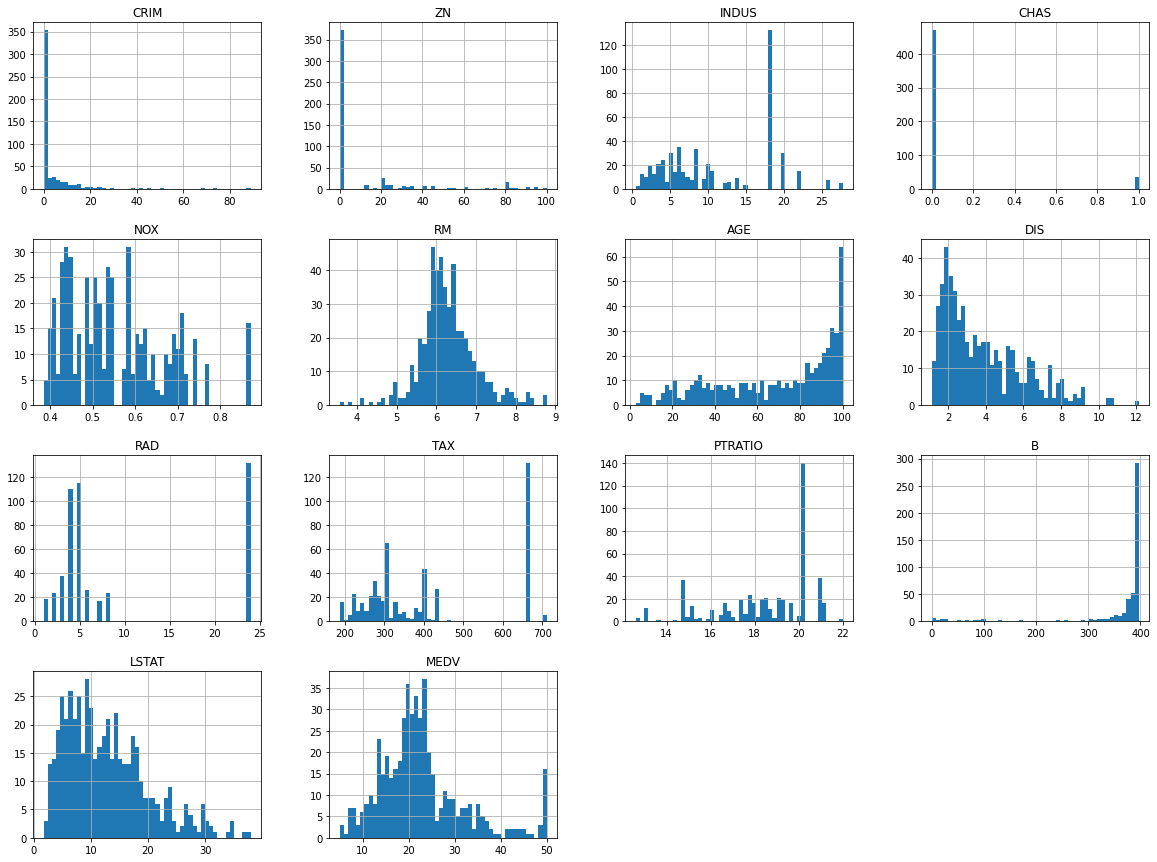

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

## Train Test Spliting

In [9]:
import  numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[: test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [10]:
train_set, test_set = split_train_test(housing, 0.25)

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.25, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 378
Rows in test set: 127



In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set['CHAS'].value_counts()

0    118
1      9
Name: CHAS, dtype: int64

In [14]:
strat_train_set['CHAS'].value_counts()

0    352
1     26
Name: CHAS, dtype: int64

In [15]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)


MEDV       1.000000
RM         0.695365
ZN         0.360393
B          0.333394
DIS        0.249896
CHAS       0.175364
AGE       -0.376932
RAD       -0.381690
CRIM      -0.388249
NOX       -0.427295
TAX       -0.468543
INDUS     -0.484126
PTRATIO   -0.508411
LSTAT     -0.738187
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

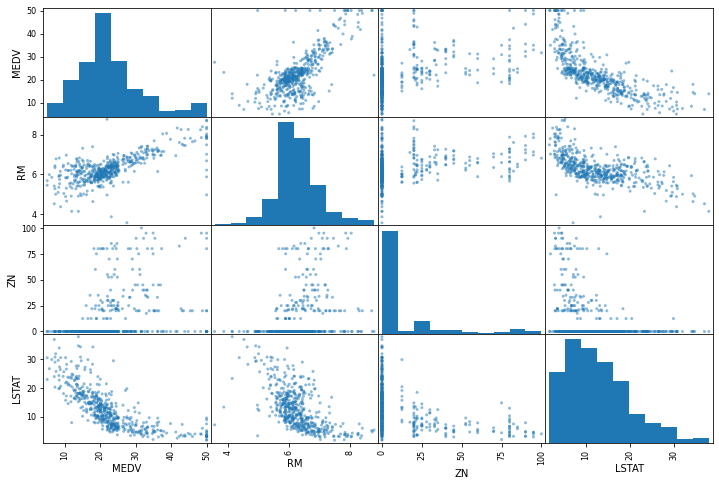

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

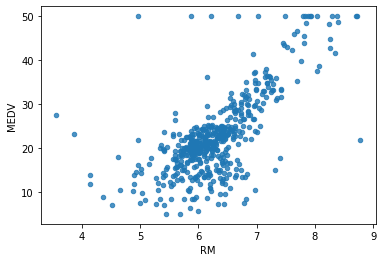

In [17]:
housing.plot(kind="scatter", x="RM", y ="MEDV",alpha= 0.8)

In [18]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [19]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,3.649102,10.141534,11.199762,0.068783,0.556738,6.258725,68.396032,3.773537,9.568783,408.563492,18.474339,353.980026,12.734471
std,8.357100,21.818377,6.787865,0.253420,0.117465,0.698689,28.403734,2.110322,8.715776,168.105207,2.113680,94.225516,7.153124
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.088267,0.000000,5.190000,0.000000,0.449000,5.876250,44.550000,2.091325,4.000000,280.250000,17.400000,373.852500,7.215000
50%,0.262660,0.000000,9.900000,0.000000,0.538000,6.185000,77.500000,3.175750,5.000000,332.000000,19.000000,390.980000,11.465000
75%,3.689388,9.375000,18.100000,0.000000,0.629250,6.605500,94.475000,5.100400,24.000000,666.000000,20.200000,396.192500,16.570000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy ="median")),
        ('std_scaler', StandardScaler()),
])

In [21]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [22]:
housing_num_tr.shape

(378, 13)

In [23]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [24]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([47.229, 19.346, 21.019, 24.792, 24.527])

In [25]:
list(some_labels)

[50.0, 16.5, 20.9, 25.0, 24.8]

In [26]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_prediction)
lin_mse = np.sqrt(lin_mse)

In [27]:
lin_mse

1.300189511013785

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [29]:
rmse_scores

array([4.22343788, 2.93811429, 2.618632  , 3.03290555, 2.92317859,
       1.97640938, 7.31144233, 2.74487415, 2.78444177, 5.02947829])

In [30]:
def print_scores(scores):
    print("Scores: ", scores)
    print("mean :", scores.mean())
    print("standard deviation: ", scores.std())

In [31]:
print_scores(rmse_scores)

Scores:  [4.22343788 2.93811429 2.618632   3.03290555 2.92317859 1.97640938
 7.31144233 2.74487415 2.78444177 5.02947829]
mean : 3.5582914222912656
standard deviation:  1.4967555669867632


In [35]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

In [38]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[21.136 24.151 33.754 46.53  20.425 26.612 13.695 32.007 20.275 22.795
 16.013 13.549 23.405 25.92  46.243 46.703 15.101 19.696  8.553 33.33
 28.875 23.715 21.852 19.669 21.3   14.919 13.418 10.148 22.823 16.269
 41.443 16.125 15.805 23.159 20.32  21.964 20.632 34.666 23.523 19.272
 18.19  33.53  34.706  7.858 12.599 33.079 28.691 15.787 21.469  9.953
 14.253 18.718 12.572 20.384 17.854 18.452 47.689 20.208 24.813 32.664
 20.866 10.497 26.038 25.235 35.933 20.86  20.294 18.368 13.625 18.809
 18.392 20.507 23.286 12.585 10.065 20.015 33.255  9.593 22.252 23.577
 29.913 11.136 33.771 19.464 16.162 15.775 30.996 12.225 43.269 47.462
 20.921 26.059 20.626 24.12  20.506 33.381 15.748  6.893 34.514 19.098
 14.144 21.591 19.77  20.61  18.239 20.075 25.513 19.914 46.544 19.408
 20.691 42.872 13.643 31.167 27.639 23.876 34.554 19.768 20.352 27.244
 33.194 33.711 20.757 24.906 19.591 21.915 21.819] [23.4, 23.1, 31.7, 50.0, 22.3, 23.9, 17.2, 30.3, 22.7, 22.0, 17.4, 19.1, 24.6, 27.5, 48.3, 48.8, 1

In [39]:
final_rmse

3.4028631008996766

In [40]:
prepared_data[0]

array([-0.43542726,  3.66499798, -1.47365962,  3.67946484, -1.32757625,
        2.38515343, -1.53690402,  1.00186689, -0.98443786, -1.25422985,
       -2.30914781,  0.44144126, -1.3402761 ])